# PJ01 - Choose Your Own Analysis

## Hypotheses: We can see trends in a students  experience (number of programming languages and number of prerequisites) that correlate to how they view this class and their experience in it.

Does the number of programming languages of number of prereqs taken affect how the student rates the effectiveness of the class or their "experience" in it.

I have borrowed some basic template material from the data_wrangling.ipynb file used in ex04.



In [1]:
__author__ = "730366999"

Implementing the utility functions for this exercise in the `data_utils.py` file found in the `projects/pj01` directory. Since your Jupyter Notebook _kernel_ is running the entire time you are working on functions in `data_utils.py`, we will use a special extension to automatically reload any changes you make _and save_ in modules you import. The special conventions in the cell below are turning this feature on.

In [2]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


Data files will be stored in the `data` directory of the workspace. This Notebook is located in `projects/pj01` directory. If you think of how to _navigate_ from this directory to the `data` directory, you would need to go "two directories up" and then "into the `data` directory". The constant `DATA_DIRECTORY` defined below uses the convention of two dots to refer to "one directory up", so it is a `str` that references the `data` directory _relative_ to this exercise's directory.

Then, another constant is established referencing the path to the data file you will use to test your functions in this exercise.

In [3]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

# 25 points - Import and make use of the read_csv_rows, head, columnar, select, count functions from ex04.

this cell uses read_csv_rows

In [4]:
from data_utils import read_csv_rows

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)


print(f"Data File Read: {DATA_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
502 rows
36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


## Convert lines of data to a column based datastructure.

this cell uses columnar to re factor our data into a column based data structure.

In [5]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(data_rows)

if len(data_cols.keys()) == 0:
    print("Complete your implementation of columnar in data_utils.py")
    print("Be sure to follow the guidelines above and save your work before re-evaluating!")
else:
    print(f"{len(data_cols.keys())} columns")
    print(f"Columns names: {data_cols.keys()}")

36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


# Define some new columns

## The ratings are very specific, and not every student has used every available resource, so want to define some more generalized metrics about their experience and effectiveness of the class.

overall_experience - This is an average of "pace", "difficulty", "understanding", "interested", "valuable", and "would_recommend".  The purpose here is to try to capture a subjective metric of how the student feels about the class.



this cell uses the select() and head() functions to preview the first 10 rows of the overall_experience column, and the columns that were used to calculate it.
overall_experience is added to the table data_cols.





In [6]:
from data_utils import select, head, count, average_columns
from tabulate import tabulate


selected_data: dict[str, list[str]] = select(data_cols, ["pace", "difficulty", "understanding", "interested", "valuable", "would_recommend"])

data_cols["overall_experience"] = average_columns(selected_data)  # Add to our working data table.
selected_data["overall_experience"] = average_columns(selected_data)  # Add to selected data for a preview.


tabulate(head(selected_data, 10), selected_data.keys(), "html")

pace,difficulty,understanding,interested,valuable,would_recommend,overall_experience
5,5,5,7,7,6,6
7,7,3,7,7,7,6
7,7,3,7,7,7,6
4,4,5,5,6,6,5
3,5,5,4,5,4,4
4,3,5,6,6,7,5
4,2,6,6,7,6,5
7,7,3,5,7,3,5
4,2,5,5,5,6,4
5,3,6,5,4,5,5


##  look at a breakdown of the overall_experience metric by average value.

this uses the count() function.

In [7]:
breakdown: dict[str, int] = count(data_cols["overall_experience"])

for key in breakdown:
    print(f" {breakdown[key]} students gave an overall_experience rating of {key} ")


 229 students gave an overall_experience rating of 6 
 192 students gave an overall_experience rating of 5 
 76 students gave an overall_experience rating of 4 
 5 students gave an overall_experience rating of 3 


### Another new metric defined.

overall_effective - This is an average of "ls_effective", "lsqs_effective", "programming_effective", "qz_effective", "oh_effective", "tutoring_effective", and "kaki_effective".  The purpose here is to have an overall effectiveness rating of the class.

this cell uses the select() and head() functions to preview the first 10 rows of the overall_experience column, and the columns that were used to calculate it.
overall_effective is added to the table data_cols.


In [8]:


selected_data: dict[str, list[str]] = select(data_cols, ["ls_effective", "lsqs_effective", "programming_effective", "qz_effective", "oh_effective", "tutoring_effective", "kaki_effective"])

data_cols["overall_effective"] = average_columns(selected_data)  # Add to our working data table.
selected_data["overall_effective"] = average_columns(selected_data)  # Add to selected data for a preview.

tabulate(head(selected_data, 10), selected_data.keys(), "html")

ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,kaki_effective,overall_effective
3,5,3,4,7,3,4,4
5,2,3,7,7,,7,5
5,2,3,7,7,,7,5
6,6,6,6,,,7,6
4,5,6,4,,,,5
6,6,6,6,,,,6
5,3,6,6,,,,5
7,5,5,4,6,,5,5
5,5,7,4,5,5,5,5
6,6,7,5,,,6,6


##  look at a breakdown of the overall_effectivee metric by average value.

this uses the count() function.

In [9]:
breakdown: dict[str, int] = count(data_cols["overall_effective"])

for key in breakdown:
    print(f" {breakdown[key]} students gave an overall_effective rating of {key} ")


 95 students gave an overall_effective rating of 4 
 152 students gave an overall_effective rating of 5 
 193 students gave an overall_effective rating of 6 
 51 students gave an overall_effective rating of 7 
 7 students gave an overall_effective rating of 3 
 1 students gave an overall_effective rating of 1 
 3 students gave an overall_effective rating of 2 


## Uses a new function (csv_in_column_distribution) to analyze fields that are a list of coma seperated values.

### Statistics of comma seperated list of values like languages or prereqs

This will give a distribution of how many students have taken each language or prereq in the csv list.

In [10]:

from data_utils import csv_in_column_distribution

print("Distribution of prereqs taken:")
list_csv: list[str] = data_cols["prereqs"]

prereq_breakdown: dict[str, int] = csv_in_column_distribution(list_csv)

for item in prereq_breakdown.keys():
    print(f"{prereq_breakdown[item]} students have taken {item}")

print("\n\n\nDistribution of languages taken:")

list_csv = data_cols["languages"]

breakdown: dict[str, int] = csv_in_column_distribution(list_csv)

for item in breakdown.keys():
    print(f"{breakdown[item]} students have taken {item}")





Distribution of prereqs taken:
474 students have taken MATH 231
288 students have taken MATH 232
157 students have taken MATH 233
238 students have taken STOR 155
159 students have taken MATH 130
20 students have taken STOR 120
66 students have taken STOR 151
33 students have taken MATH 347
71 students have taken MATH 381
224 students have taken MATH 129P
80 students have taken PSYC 210
20 students have taken STOR 113
5 students have taken STOR 112
28 students have taken MATH 152
23 students have taken MATH 210
4 students have taken PHIL 155 STOR 155
3 students have taken PSYC 215
1 students have taken PHIL 155 - Truth and Proof
1 students have taken PHIL 155 STOR 151



Distribution of languages taken:
163 students have taken Python
40 students have taken R / Matlab / SAS
6 students have taken Other
60 students have taken Java / C#
48 students have taken HTML / CSS
11 students have taken SQL
7 students have taken BASIC
25 students have taken C / C++
37 students have taken JavaScript /

### 25 points - Define at least one function that produces a mask based on some criteria. Reminder: For our purposes, a mask is a list[bool]. To get credit for this requirement, it must be a different function than the less_than one defined in this video. You are free to make use of the less_than function in your analysis, but you’ll need to come up with at least one function of your own.

### 10 points - Filter some data using this mask. You are free to use the masked function defined in class for this requirement.

# Add a column with the tally of languages taken, 0 if none. (uses a mask to filter for "None").

##uses not_none_mask() to generate a mask that is True for every row that does not have the value "None" in it.

I also use the csv_tally() function and this mask to create a column of values that are "0" when the mask is False, and the count of comma seperated values when it's true, 
to give a count of languages for each student.  This new column "language_count" is added to the data table in data_cols

In [11]:
from data_utils import not_none_mask, csv_tally

languages: list[str] = data_cols["languages"]
language_mask: list[bool] = not_none_mask(languages)

language_count: list[str] = csv_tally(languages, language_mask)

data_cols["language_count"] = language_count
print(data_cols.keys())



dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend', 'overall_experience', 'overall_effective', 'language_count'])


# Add a column with the tally of pre-reqs taken.

using the same mask and filter techniques with csv_tally() function to create prereq_count and add it to the data table.

In [12]:
prereqs: list[str] = data_cols["prereqs"]
prereq_mask: list[bool] = not_none_mask(prereqs)

prereq_count: list[str] = csv_tally(prereqs, prereq_mask)

data_cols["prereq_count"] = prereq_count
print(data_cols.keys())

dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend', 'overall_experience', 'overall_effective', 'language_count', 'prereq_count'])


## seperate out the ratings by number of prereqs and number of programming languages.

Uses a newly defined function csv_in_column_distribution() to make a dict that contains the counts of how many times each unique value appears in the column of csv languages or prereqs.

In [13]:

print("Distribution of prereqs taken:")
list_csv: list[str] = data_cols["prereq_count"]

prereq_breakdown: dict[str, int] = csv_in_column_distribution(list_csv)

for item in prereq_breakdown.keys():
    print(f"{prereq_breakdown[item]} students have taken {item} prereqs.")

print("\n\n\nDistribution of languages taken:")

list_csv = data_cols["language_count"]

breakdown: dict[str, int] = csv_in_column_distribution(list_csv)

for item in breakdown.keys():
    print(f"{breakdown[item]} students have taken {item} languages.")



Distribution of prereqs taken:
118 students have taken 4 prereqs.
40 students have taken 6 prereqs.
68 students have taken 5 prereqs.
95 students have taken 2 prereqs.
116 students have taken 3 prereqs.
9 students have taken 8 prereqs.
30 students have taken 1 prereqs.
19 students have taken 7 prereqs.
3 students have taken 9 prereqs.
3 students have taken 11 prereqs.
1 students have taken 10 prereqs.



Distribution of languages taken:
40 students have taken 3 languages.
43 students have taken 1 languages.
11 students have taken 5 languages.
3 students have taken 8 languages.
332 students have taken 0 languages.
65 students have taken 2 languages.
7 students have taken 4 languages.
1 students have taken 6 languages.


## grouping by number of prereqs taken.

making a dict where the keys are the prereq_count values, and the values are a dict of lists for overall_experience and overall_effective values for each student with the corresponding prereq count.  This produces a seperate data set for each value of prereq_count that I then average and store the rounded average_experience and average_effective as single element lists to remain consistend with the data type.

I print out a list of the average values for each prereq_count to give a preview of where our analysis is going.  In reality, I was surprised at the result, it's almost a flat line.


In [14]:
from data_utils import average_list, str_list_to_int

prereq_count_dict: dict[str, dict[str, list[str]]] = {}



for i in range(len(data_cols["overall_experience"])):
    if data_cols["prereq_count"][i] in prereq_count_dict.keys():
        prereq_count_dict[data_cols["prereq_count"][i]]["overall_experience"].append(data_cols["overall_experience"][i])
        prereq_count_dict[data_cols["prereq_count"][i]]["overall_effective"].append(data_cols["overall_effective"][i])
    else:
        prereq_count_dict[data_cols["prereq_count"][i]] = {"overall_experience": [data_cols["overall_experience"][i]], "overall_effective": [data_cols["overall_experience"][i]]}

for key in prereq_count_dict:
    prereq_count_dict[key]["average_experience"] = [str(round(average_list(str_list_to_int(prereq_count_dict[key]["overall_experience"]))))]
    prereq_count_dict[key]["average_effective"] = [str(round(average_list(str_list_to_int(prereq_count_dict[key]["overall_effective"]))))]


for i in range(12):
    if str(i) in prereq_count_dict.keys():
        print("Key = " + str(i) + " avg exp = " + prereq_count_dict[str(i)]["average_experience"][0] + " avg exp = " + prereq_count_dict[str(i)]["average_effective"][0] )

Key = 1 avg exp = 5 avg exp = 5
Key = 2 avg exp = 5 avg exp = 5
Key = 3 avg exp = 5 avg exp = 5
Key = 4 avg exp = 5 avg exp = 5
Key = 5 avg exp = 5 avg exp = 5
Key = 6 avg exp = 5 avg exp = 5
Key = 7 avg exp = 6 avg exp = 6
Key = 8 avg exp = 5 avg exp = 5
Key = 9 avg exp = 5 avg exp = 4
Key = 10 avg exp = 6 avg exp = 6
Key = 11 avg exp = 5 avg exp = 5


## grouping by number of language_count.  Creating a second dataset based on each unique value of language_count, using the same techniques.

This also is showing almost no variation across the number of languages.


In [15]:
language_count_dict: dict[str, dict[str, list[str]]] = {}



for i in range(len(data_cols["overall_experience"])):
    if data_cols["language_count"][i] in language_count_dict.keys():
        language_count_dict[data_cols["language_count"][i]]["overall_experience"].append(data_cols["overall_experience"][i])
        language_count_dict[data_cols["language_count"][i]]["overall_effective"].append(data_cols["overall_effective"][i])
    else:
        language_count_dict[data_cols["language_count"][i]] = {"overall_experience": [data_cols["overall_experience"][i]], "overall_effective": [data_cols["overall_experience"][i]]}


for key in language_count_dict:
    language_count_dict[key]["average_experience"] = [str(round(average_list(str_list_to_int(language_count_dict[key]["overall_experience"]))))]
    language_count_dict[key]["average_effective"] = [str(round(average_list(str_list_to_int(language_count_dict[key]["overall_effective"]))))]


for i in range(12):
    if str(i) in language_count_dict.keys():
        print("Key = " + str(i) + " avg exp = " + language_count_dict[str(i)]["average_experience"][0] + " avg exp = " + language_count_dict[str(i)]["average_effective"][0] )

Key = 0 avg exp = 5 avg exp = 5
Key = 1 avg exp = 5 avg exp = 5
Key = 2 avg exp = 5 avg exp = 5
Key = 3 avg exp = 5 avg exp = 5
Key = 4 avg exp = 6 avg exp = 6
Key = 5 avg exp = 5 avg exp = 5
Key = 6 avg exp = 5 avg exp = 5
Key = 8 avg exp = 5 avg exp = 5


## define data_set_1 and data_set_2


create a dict of lists for use by the matplotlib graphing.

dataset 1 is based on the number of prereqs taken.

dataset 2 is based on the number of languages.

In [16]:
data_set_1: dict[str, list] = {"prereq_count": [], "average_experience": [], "average_effective": []}

for i in range(12):
    if str(i) in prereq_count_dict.keys():
        data_set_1["prereq_count"].append(i)
        data_set_1["average_experience"].append(int(prereq_count_dict[str(i)]["average_experience"][0]))
        data_set_1["average_effective"].append(int(prereq_count_dict[str(i)]["average_effective"][0]))

print(data_set_1)


data_set_2: dict[str, list] = {"language_count": [], "average_experience": [], "average_effective": []}

for i in range(12):
    if str(i) in language_count_dict.keys():
        data_set_2["language_count"].append(i)
        data_set_2["average_experience"].append(int(language_count_dict[str(i)]["average_experience"][0]))
        data_set_2["average_effective"].append(int(language_count_dict[str(i)]["average_effective"][0]))

print(data_set_2)

{'prereq_count': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'average_experience': [5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5], 'average_effective': [5, 5, 5, 5, 5, 5, 6, 5, 4, 6, 5]}
{'language_count': [0, 1, 2, 3, 4, 5, 6, 8], 'average_experience': [5, 5, 5, 5, 6, 5, 5, 5], 'average_effective': [5, 5, 5, 5, 6, 5, 5, 5]}


### 10 points - Above and beyond! Produce 2 visuals. Could be a data table or a plot. The libraries mentioned in this video are a good place to start! Feel free to explore what is out there. (Note: above and beyond points are included in the total score. If you choose not to do this, you can still earn 90% credit, which is an A)

This cell plots average_effective and average_experience (y-axis) against the prereq_count.  

<BarContainer object of 11 artists>

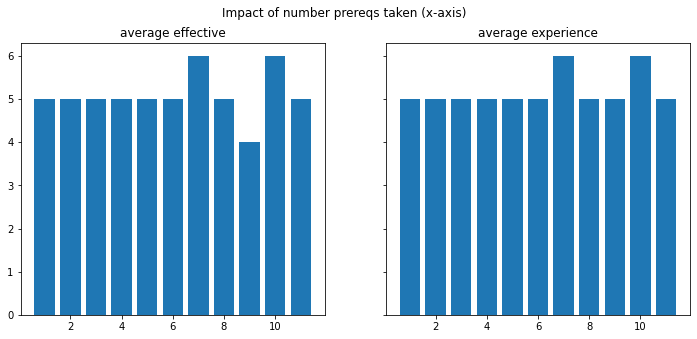

In [21]:
from matplotlib import pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Impact of number prereqs taken (x-axis)")


axes[0].set_title("average effective")
axes[0].bar(data_set_1["prereq_count"], data_set_1["average_effective"])
axes[0].tick_params(axis='x', labelrotation = 0)

axes[1].set_title("average experience")
axes[1].bar(data_set_1["prereq_count"], data_set_1["average_experience"])


This cell plots average_effective and average_experience (y-axis) against the language_count.  

<BarContainer object of 8 artists>

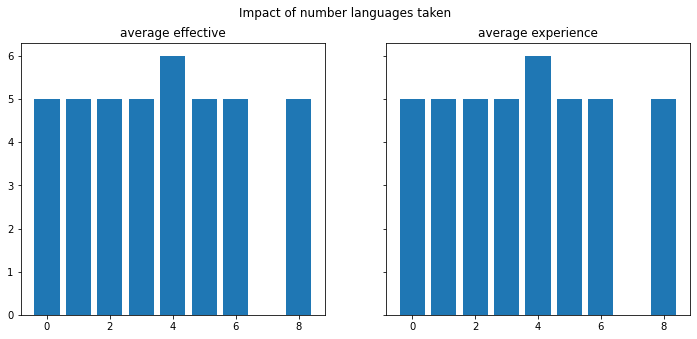

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Impact of number languages taken (x-axis)")


axes[0].set_title("average effective")
axes[0].bar(data_set_2["language_count"], data_set_2["average_effective"])
axes[0].tick_params(axis='x', labelrotation = 0)

axes[1].set_title("average experience")
axes[1].bar(data_set_2["language_count"], data_set_2["average_experience"])

# Conclusions

well, my expectation was that students that had more prereqs and more programming languages taken would have a different view of the effectiveness and "experience" of the class from their classmates that had far fewer, but I found a surprising consistency across the spectrum.  I didn't find any clear trend for either factor.  While there may be some trends on the individual ratings, when they are grouped and averaged like I did, it looks like the number of prereqs taken (an approximate measure of college experience) and the number of programming languages (an approximate measure of programming exposure) don't really seem to affect how a student views the difficulty and pacing of the class (overall_experience) or how effective the class is in general (overall_effective).  This appears to suggest that the class is designed well in that students of widely varying experiences and backgrounds don't appear to be at an advantage or disadvantage when compared to their peers.

### 10 points - Final markdown cell is a conclusion paragraph summarizing your findings. Were you able to answer your question or prove your hypothesis? It is totally OK (and part of the process) to not get what you initially expected. You can still get full credit even if you end up contradicting your hypothesis :)